In [36]:
import ssl
import pandas as pd
from sklearn import set_config
from sklearn.pipeline import make_pipeline, FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder

set_config(transform_output = "pandas")

ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv('https://raw.githubusercontent.com/ElieLECAS/ML_avance/fil_rouge/activite_finale/data/census.csv')
df.drop(['fnlwgt'], axis=1, inplace=True)
display(df)
y = df['income'].copy()
X = df.loc[:, df.columns != 'income'].copy()


#X_train


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48838,64,?,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48839,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
48840,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [43]:
display(df.loc[df.duplicated()])
df = df.drop_duplicates(ignore_index=True)
df.describe()

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=.85, shuffle=True)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
352,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,2
391,27,Private,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,0
563,24,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,0
570,24,Private,HS-grad,9.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,0
673,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48823,51,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,1
48824,22,Private,Some-college,10.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,1
48830,32,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,United-States,1
48833,31,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,1


,age,education_num,capital_gain,capital_loss,hours_per_week,income
count,44355.000000,44355.000000,44355.000000,44355.000000,44355.000000,44355.000000
mean,39.242025,10.095096,1180.267501,95.881096,40.590553,0.833931
std,13.755937,2.634697,7781.242634,420.914966,12.725503,0.978793
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,3.000000


Feature: income (TARGET)                     |█▎        | [ 13%]   01:49 -> (11:49 left)
Feature: income (TARGET)                     |█▎        | [ 13%]   01:01 -> (06:41 left)
Feature: income (TARGET)                     |█▎        | [ 13%]   00:48 -> (05:14 left)
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



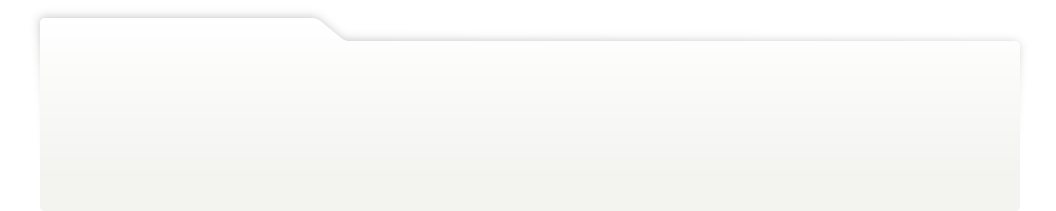
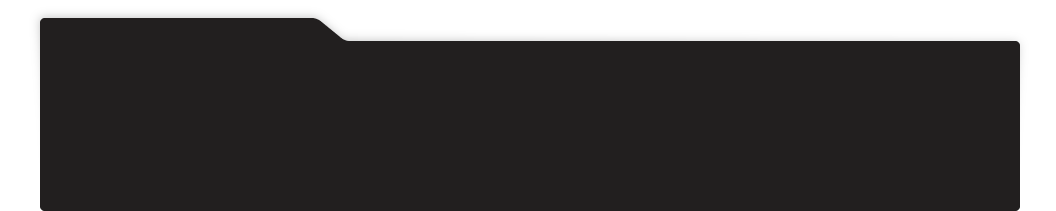
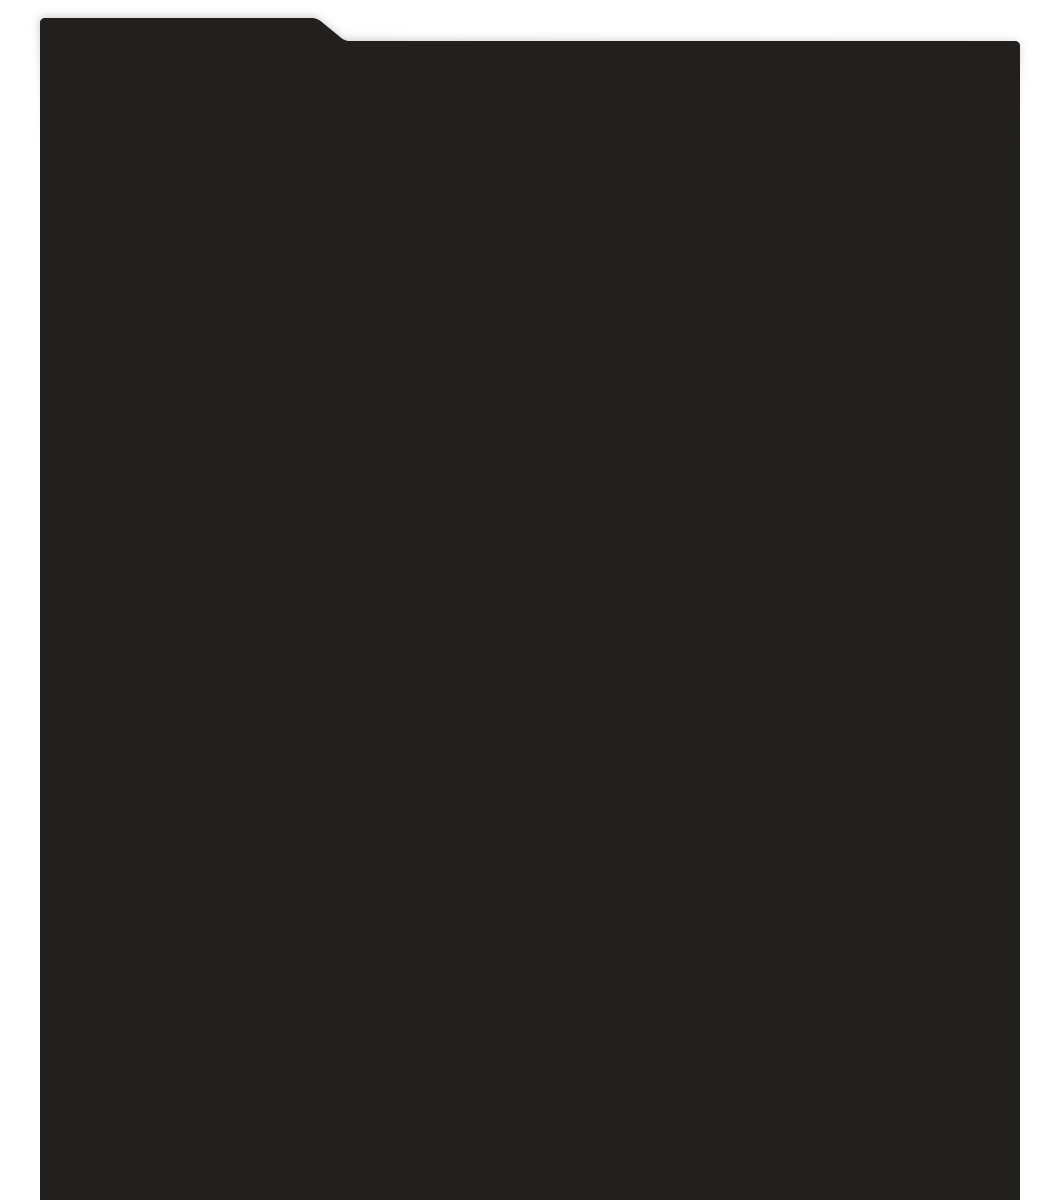
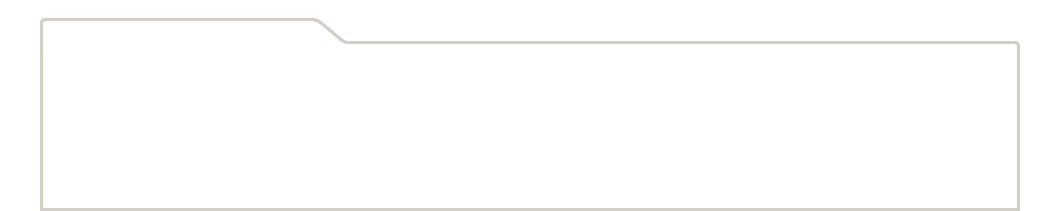
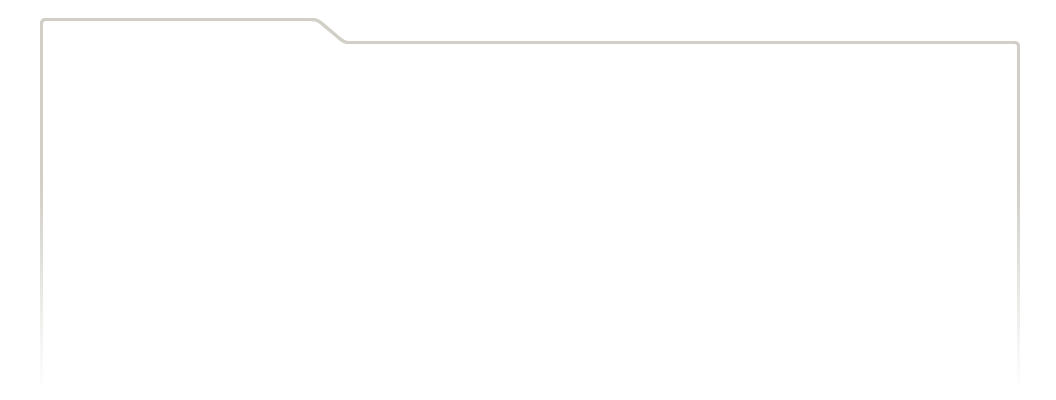
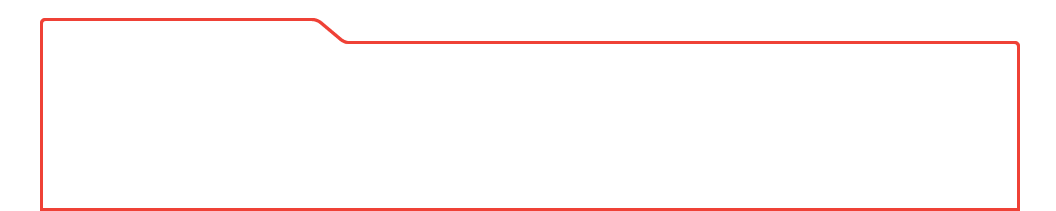
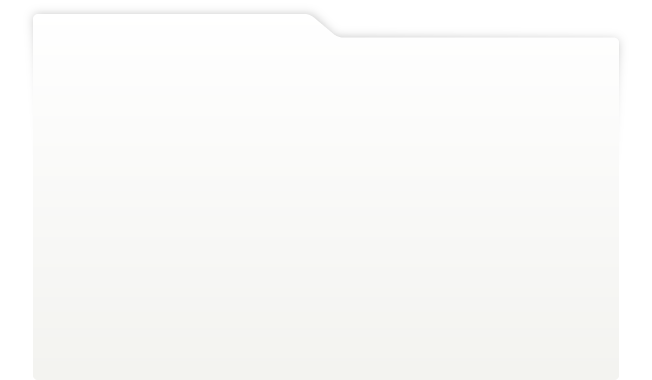
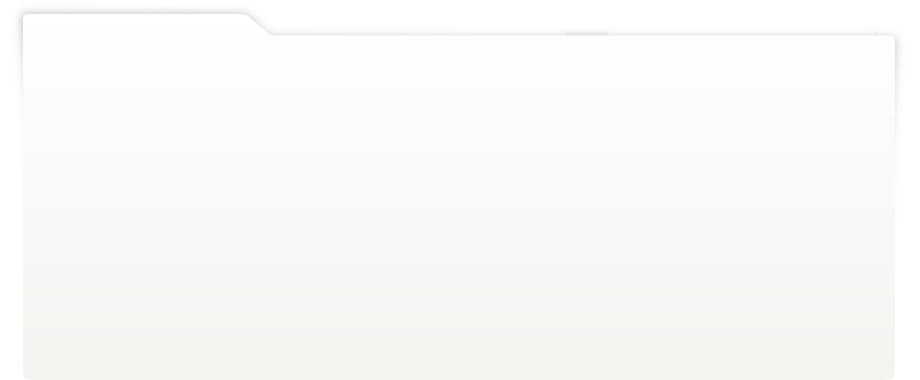
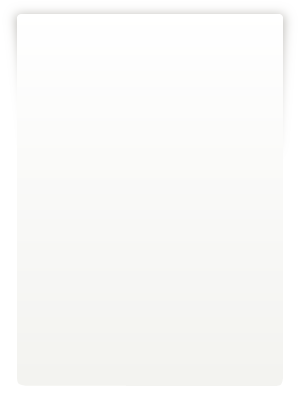
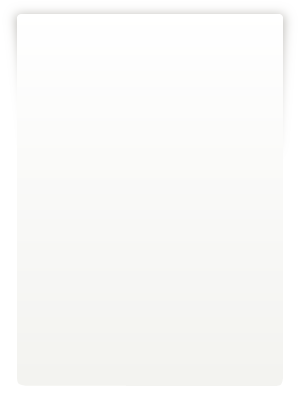
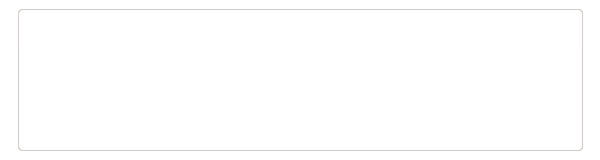
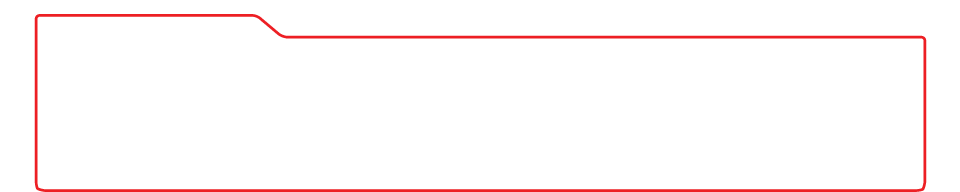
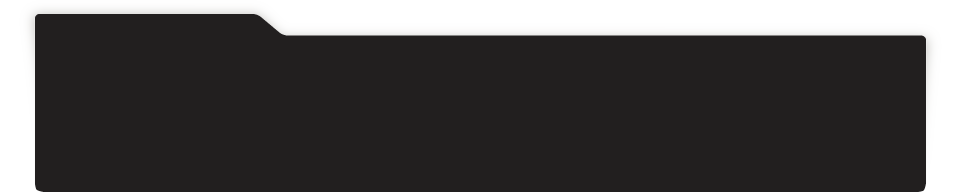
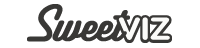
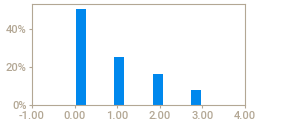
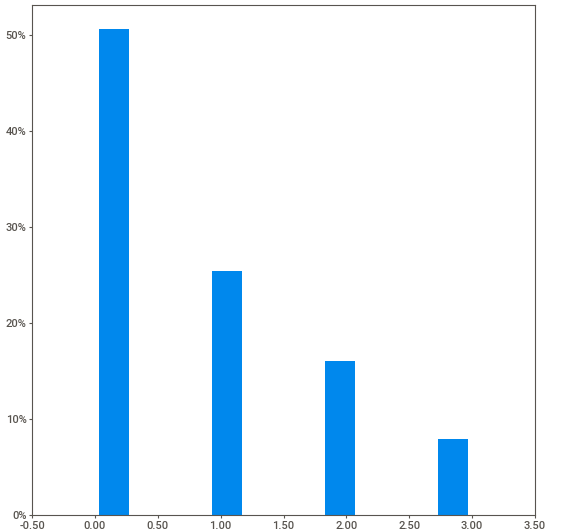
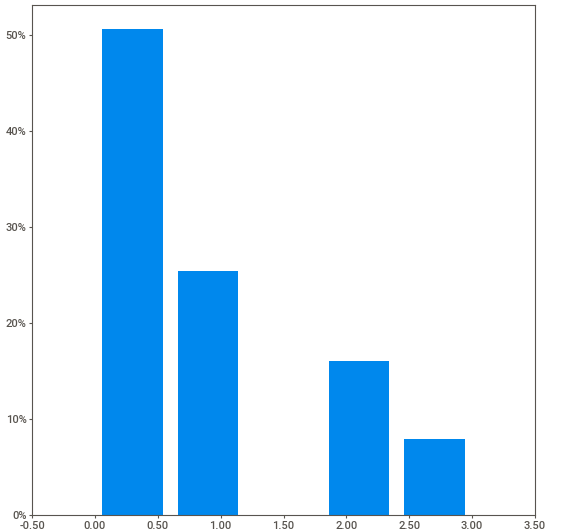
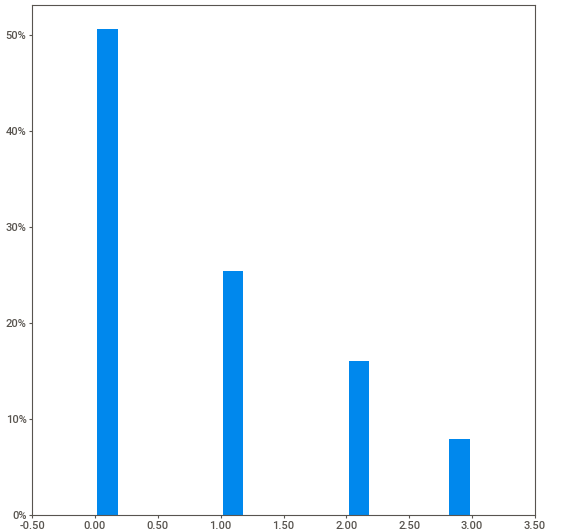
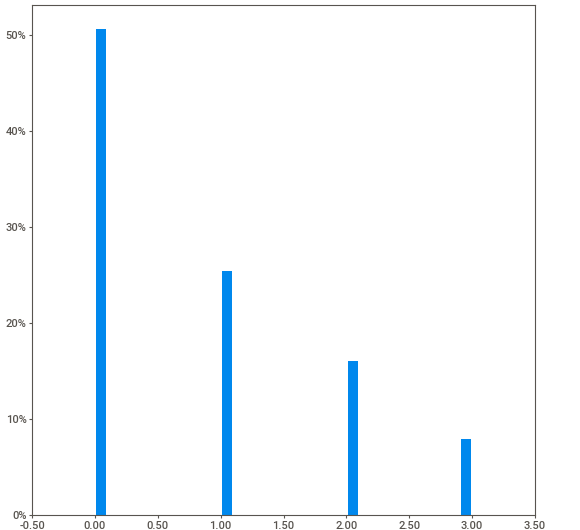
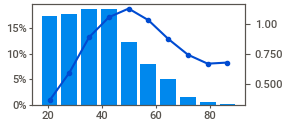
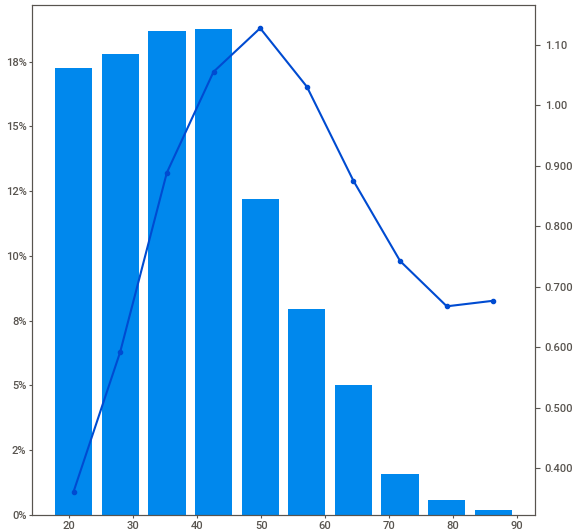
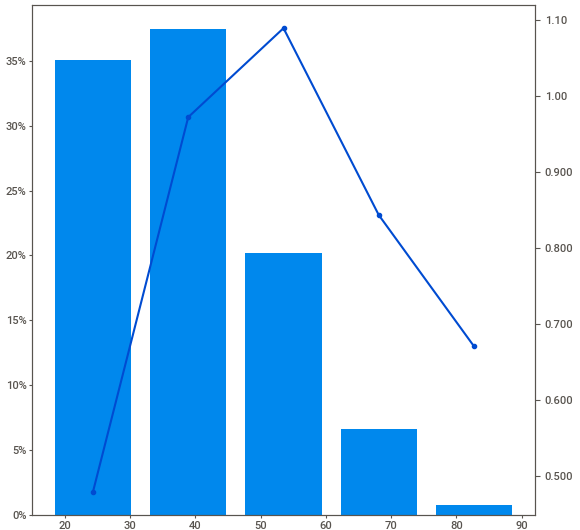
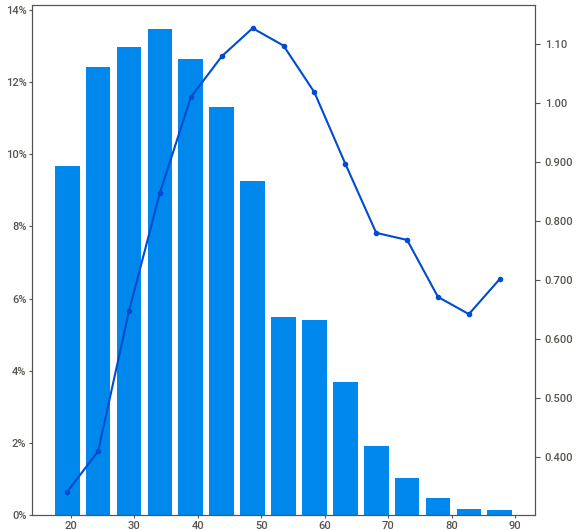
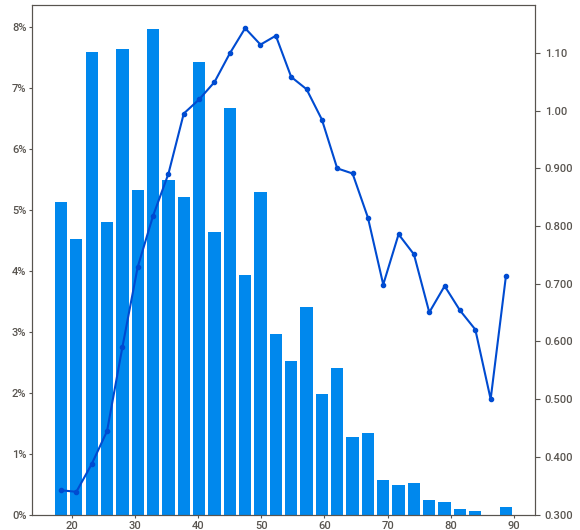
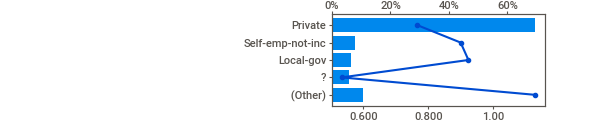
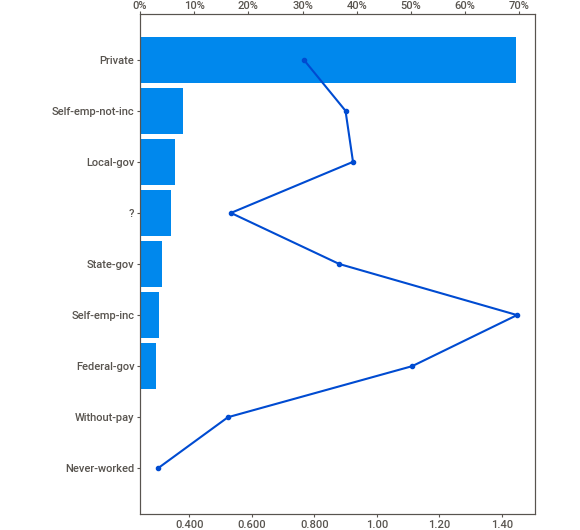
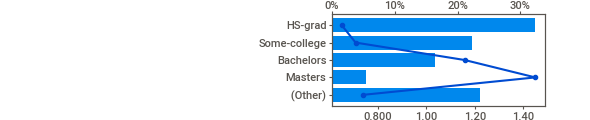
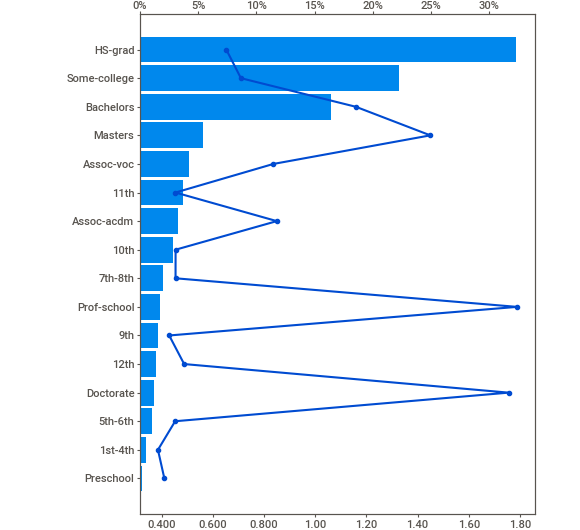
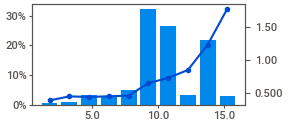
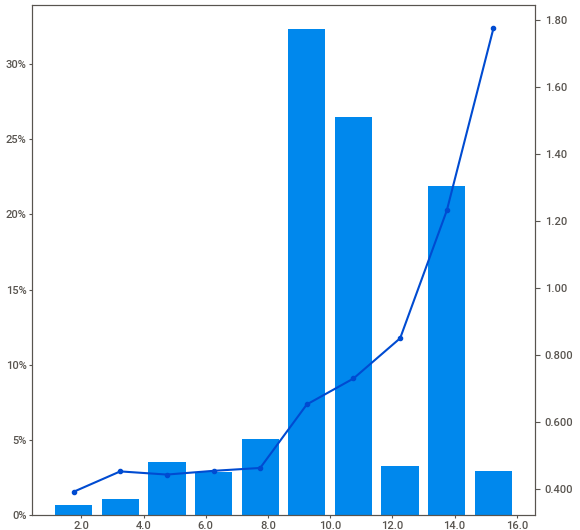
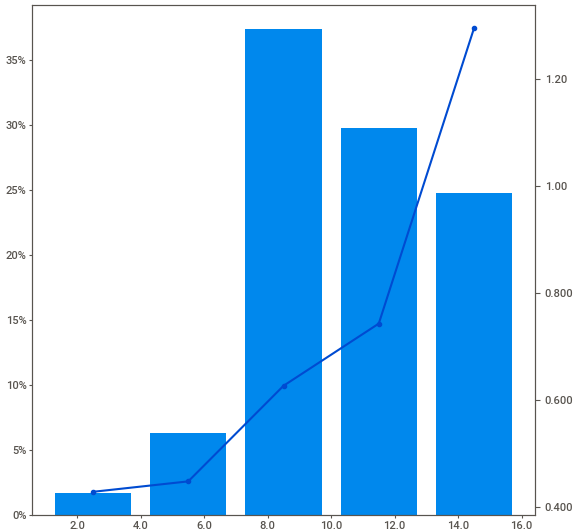
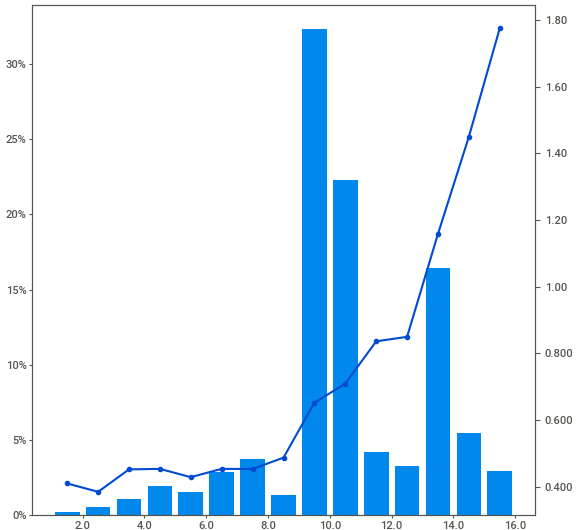
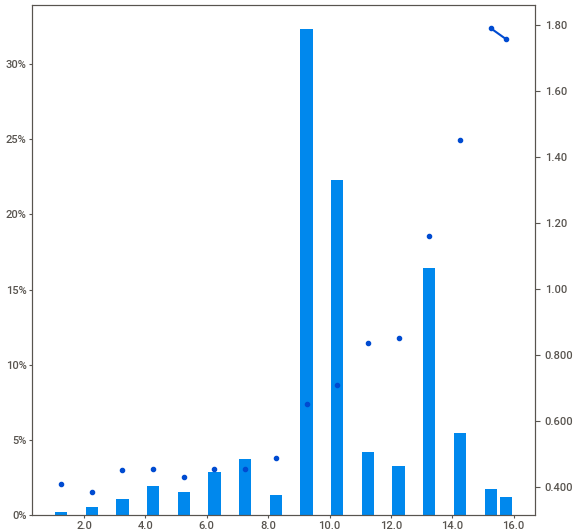
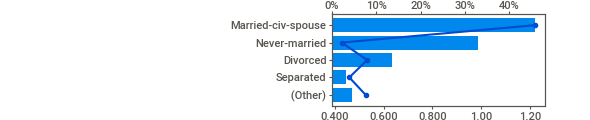
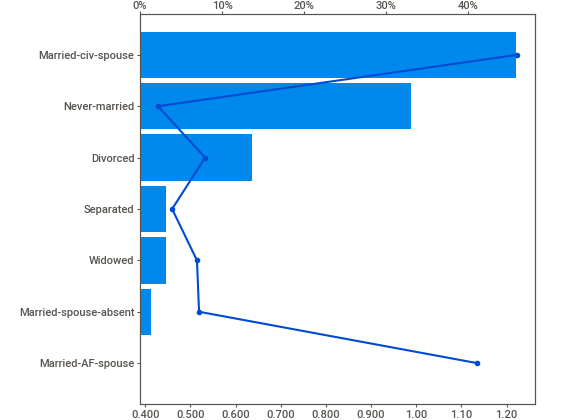
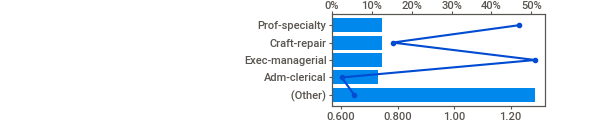
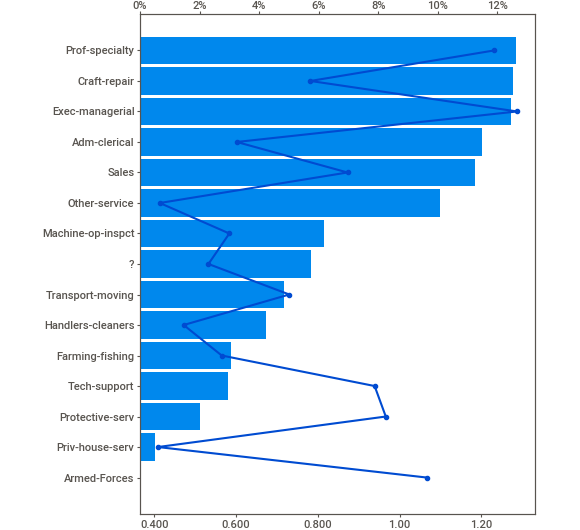
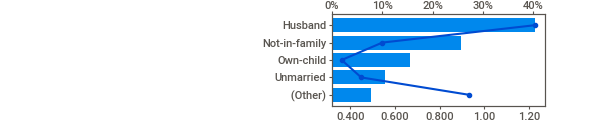
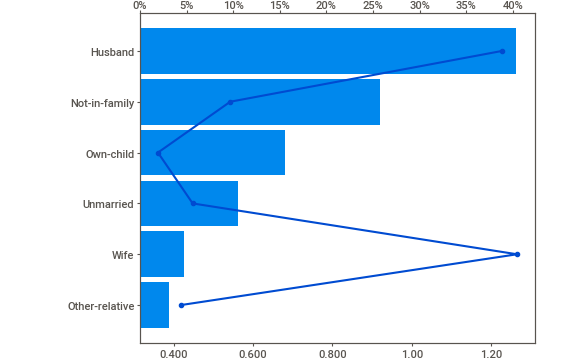
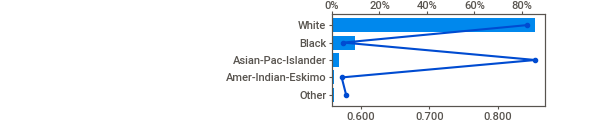
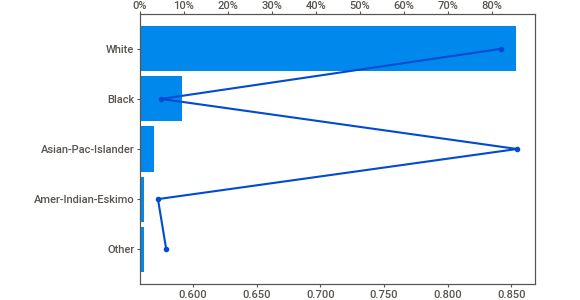
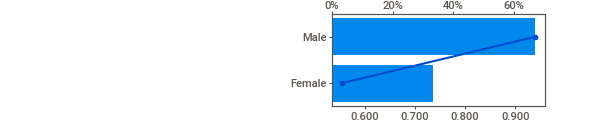
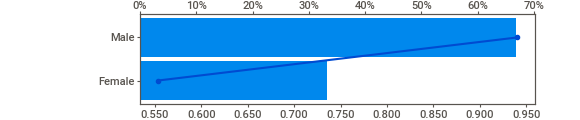
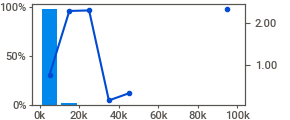
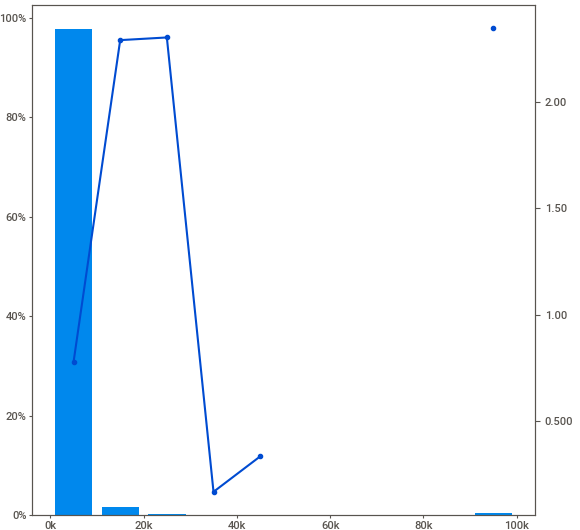
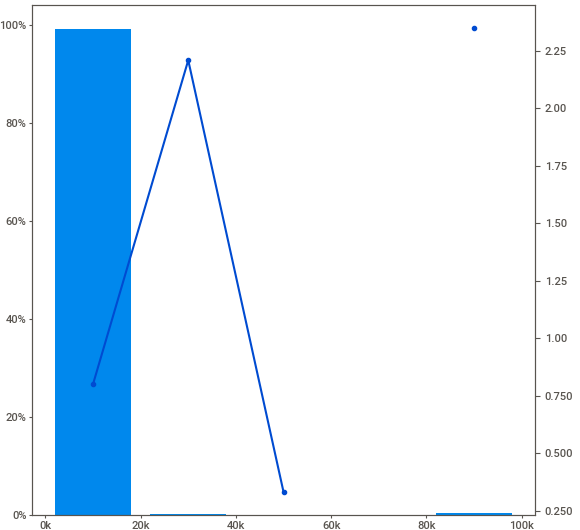
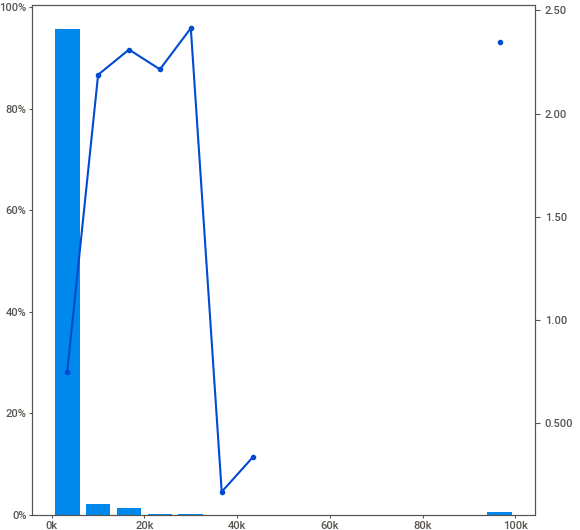
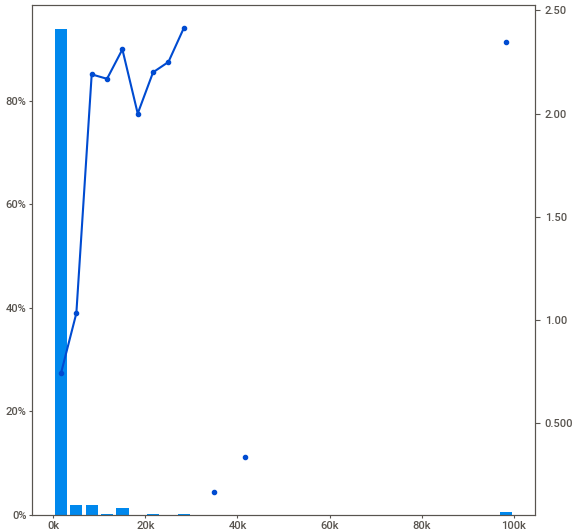
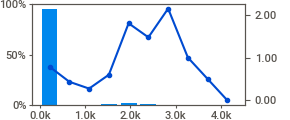
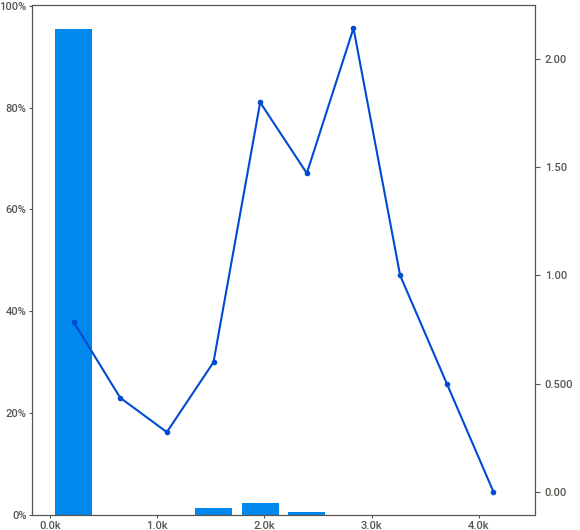
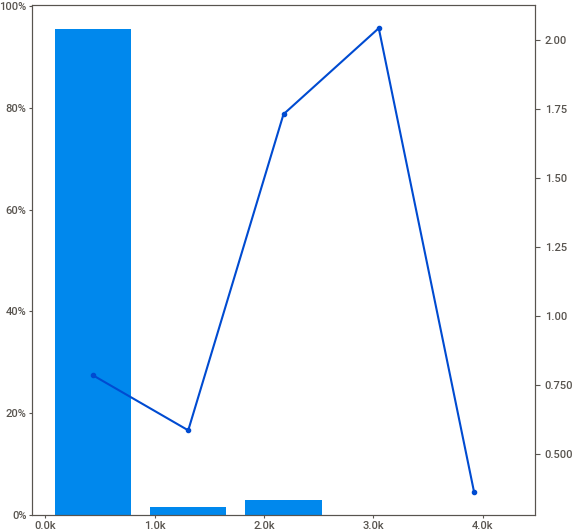
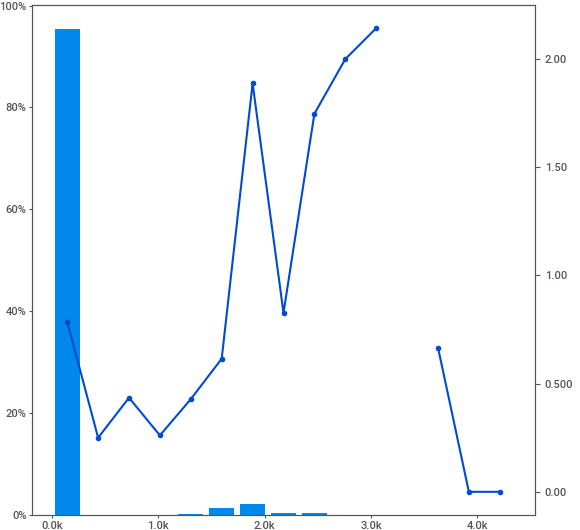
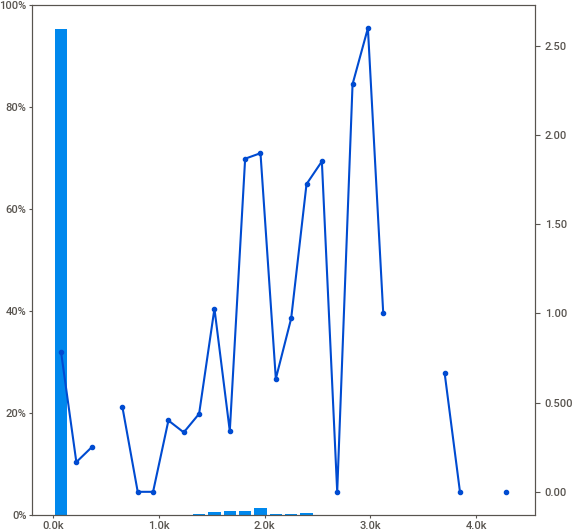
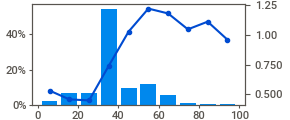
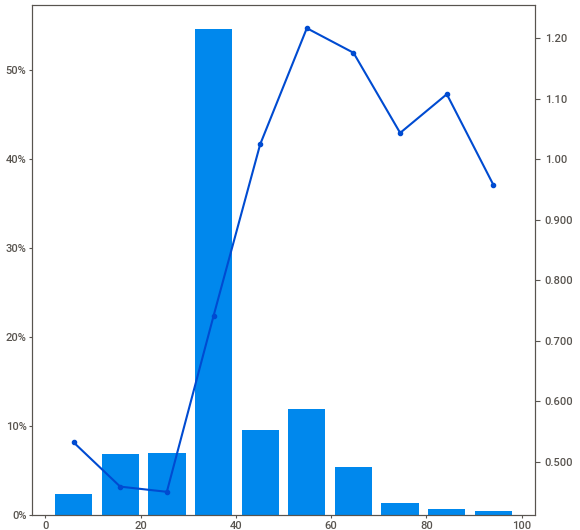
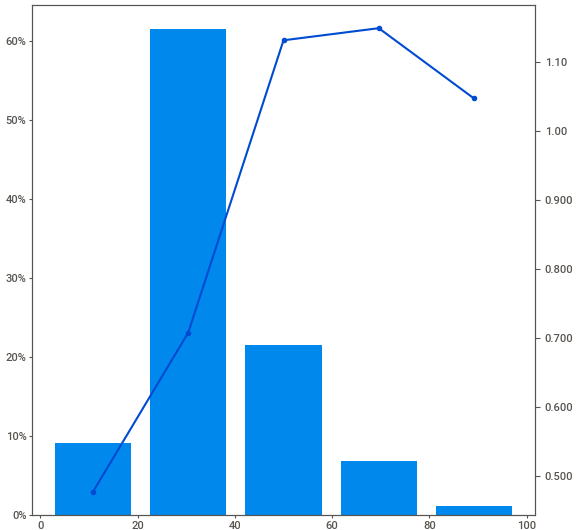
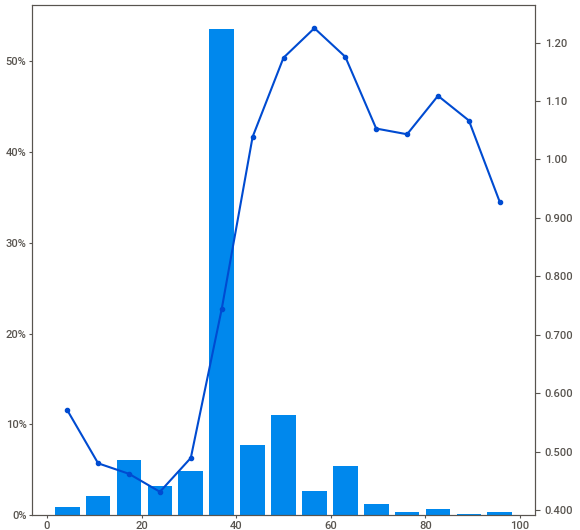
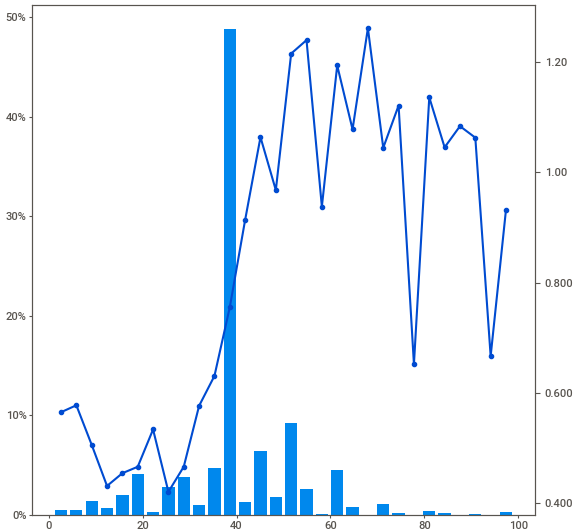
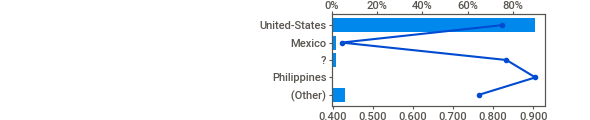
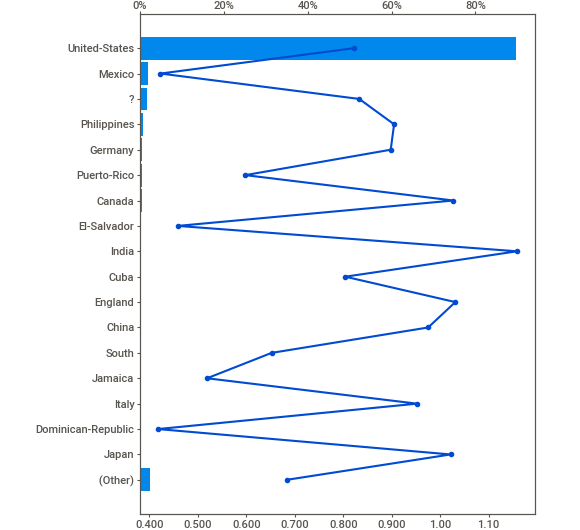
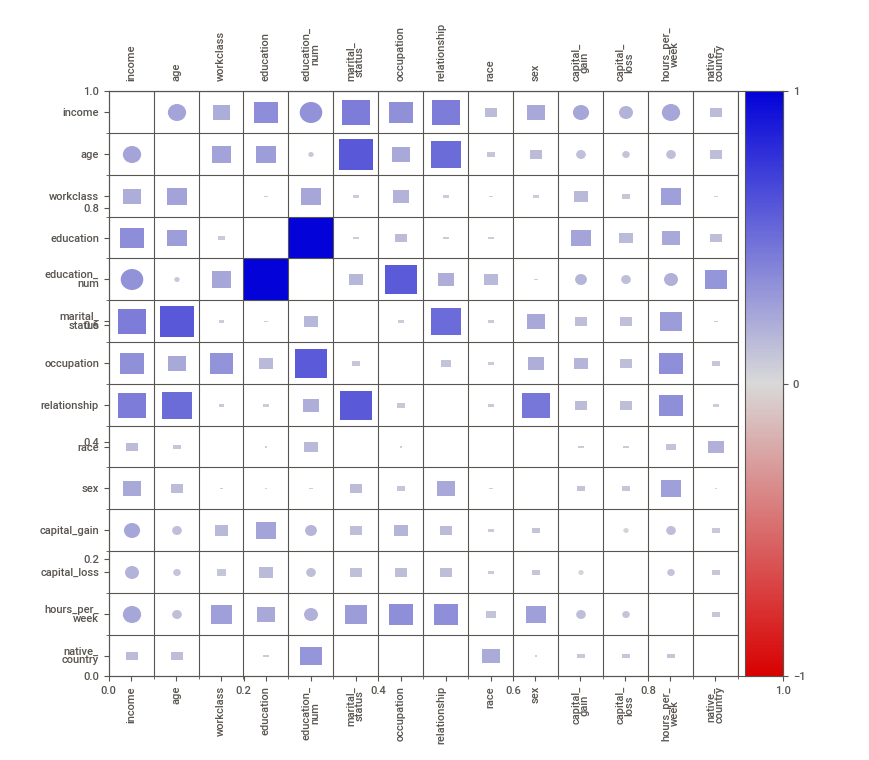
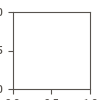

In [40]:
from sklearn.preprocessing import LabelEncoder
import sweetviz as sv
feature_config = sv.FeatureConfig(force_num=["income"])

le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
sweet_report = sv.analyze(df, 'income', feat_cfg=feature_config)
sweet_report.show_notebook()

In [10]:
df.capital_loss.var()

164462.07771367978

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

def custom_func(df):
    df.loc[df['bmi'] < 18.5 , 'bmi'] = 0
    df.loc[df['bmi'].between(18.5, 25, 'both'), 'bmi'] = 1
    df.loc[df['bmi'].between(25, 30, 'right'), 'bmi'] = 2
    df.loc[df['bmi'] > 30 , 'bmi'] = 3
    df.bmi = df.bmi.astype('category')
    return df

class custom_ohe(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        print(X)
        X.loc[X['bmi'] < 18.5 , 'bmi'] = 0
        X.loc[X['bmi'].between(18.5, 25, 'both'), 'bmi'] = 1
        X.loc[X['bmi'].between(25, 30, 'right'), 'bmi'] = 2
        X.loc[X['bmi'] > 30 , 'bmi'] = 3
        X.bmi = X.bmi.astype('category')
        return X

transform_func = FunctionTransformer(custom_func)

pipe_custom = make_pipeline(
    custom_ohe,
    #OneHotEncoder(variables=['bmi'])
)

transformers = make_column_transformer(
    (pipe_custom, ['bmi']),
    remainder='passthrough'
)

pipeline = make_pipeline(
    transformers
)

pipeline.fit(X_train, y_train)

df_X_train = pipeline.fit_transform(X_train, y_train)
df_X_train.head()



AttributeError: 'DataFrame' object has no attribute 'fit'

In [51]:
from sklearn.linear_model import LinearRegression

pipe = make_pipeline(
                    pipeline,
                    LinearRegression()
                )

pipe.fit(X_train, y_train)

['data/model_grid.joblib']

In [52]:
from joblib import dump, load

model_path = 'data/model_grid.joblib'
dump(pipe, model_path) 

['data/model_grid.joblib']